In [91]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *

In [92]:
data=pd.read_csv('../../data/PAH_PCB_OCP.csv',index_col=0)
report=pd.read_csv('../../data/VEGA_report.csv',index_col=0)

In [93]:
report_logP=pd.read_csv('../../data/VEGA_QSAR_modeli/report_LOGP_ALOGP.txt',index_col=0,  sep='\t')

In [94]:
report_logP['Id'] = report_logP['Id'].replace(['Molecule 1','Molecule 2','Molecule 3','Molecule 4','Molecule 5','Molecule 6',
                                       'Molecule 7','Molecule 8','Molecule 9','Molecule 10','Molecule 11','Molecule 12',
                                       'Molecule 13','Molecule 14','Molecule 15','Molecule 16','Molecule 17','Molecule 18',
                                       'Molecule 19','Molecule 20','Molecule 21','Molecule 22','Molecule 23','Molecule 24',
                                       'Molecule 25','Molecule 26','Molecule 27','Molecule 28','Molecule 29','Molecule 30',
                                       'Molecule 31','Molecule 32','Molecule 33','Molecule 34','Molecule 35'], ['Flu', 'Pir',
       'BaA', 'Kri', 'BjF', 'BbF', 'BkF', 'BaP',
       'DahA', 'BghiP', 'IP', 'HCB', 'α-HCH', 'β-HCH', 'γ-HCH',
       'DDE', 'DDD', 'DDT', 'PCB-28', 'PCB-52', 'PCB-101', 'PCB-118',
       'PCB-153', 'PCB-138', 'PCB-180', 'PCB-74', 'PCB-60', 'PCB-123',
       'PCB-114', 'PCB-105', 'PCB-167', 'PCB-156', 'PCB-157', 'PCB-170',
       'PCB-189'])

In [95]:
kols=PCB_kol+PAH_kol+OCP_kol

In [96]:
logP=report_logP['Predicted LogP'].values

In [97]:
logP

array([3.95, 3.95, 4.56, 4.56, 4.85, 4.85, 4.85, 4.85, 5.46, 5.15, 5.15,
       5.82, 4.16, 4.16, 4.16, 5.93, 5.75, 6.33, 5.34, 6.01, 6.67, 6.67,
       7.33, 7.33, 8.  , 6.01, 6.01, 6.67, 6.67, 6.67, 7.33, 7.33, 7.33,
       8.  , 8.  ])

<Axes: >

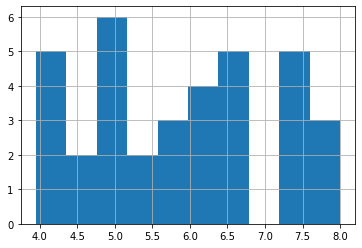

In [98]:
report_logP['Predicted LogP'].hist()

In [99]:
log_Koc= 1.03*logP-0.61

In [100]:
#Koc = 10 ** log_Koc
Koc =np.power(10,log_Koc)

In [101]:
TOC= data['TOC(%)']/100
TOC

0     0.0012
1     0.0068
2     0.0008
3     0.0219
4     0.0197
5     0.0067
6     0.0130
7     0.0154
8     0.0138
9     0.0163
10    0.0434
11    0.0173
12    0.0035
13    0.0041
14    0.0050
15    0.0055
16    0.0015
17    0.0015
18    0.0167
19    0.0055
20    0.0018
21    0.0398
22    0.0285
23    0.0415
24    0.0119
25    0.0107
26    0.0591
27    0.0145
Name: TOC(%), dtype: float64

In [102]:
Kp = np.outer(Koc, TOC)

In [103]:
Kp_array = Kp
konc_array = data.loc[:,kols].values #MJERNE JEDINICE =ng/g
LC50 = report.iloc[:,-1].values #uzet je samo jedan LC50 model, trebam neku srednju vrijednost više modela +MJERNE JEDINICE! =mg/L
LC50_array = LC50 # mg/L

# Proširivanje LC50 da postane matrica dimenzija 35x1
LC50_expanded = LC50_array[:, np.newaxis]
# Broadcasting LC50 preko svih 28 lokacija
LC50_broadcasted = np.tile(LC50_expanded, (1, 28))
# Transponiranje Kp_array da odgovara dimenzijama konc_array
Kp_transposed = Kp_array.T
# Izračunavanje TU
TUsed = konc_array / (Kp_transposed * LC50_broadcasted.T* 10**6)


In [104]:
def lllf(index_lokacija, index_rijeka):
    naziv_lokacije = data['LOKACIJA'].iloc[index_lokacija]
    naziv_rijeka = data['RIJEKA'].iloc[index_rijeka]
    return f"{naziv_lokacije} - {naziv_rijeka}"

In [105]:
# Pretpostavimo da imate nazive lokacija i molekula
nazivi_lokacija = [lllf(i, i) for i in range(len(TUsed))]
nazivi_molekula = kols

TUsed_df = pd.DataFrame(TUsed, index=nazivi_lokacija, columns=nazivi_molekula)

In [106]:
TUsed_df

,PCB-28,PCB-52,PCB-101,PCB-118,PCB-153,PCB-138,PCB-180,PCB-74,PCB-60,PCB-123,...,DahA,BghiP,IP,HCB,α-HCH,β-HCH,γ-HCH,DDE,DDD,DDT
Kuželj-Gorski kotar - Kupa,4.263928e-08,5.812310e-09,1.299749e-09,1.299749e-09,7.109948e-10,7.109948e-10,7.109948e-10,6.660572e-10,1.818175e-10,3.785342e-10,...,1.409250e-09,7.273195e-09,3.086951e-09,3.155378e-11,1.415044e-10,4.110568e-11,7.473760e-12,2.967488e-11,1.601249e-12,1.601249e-12
Iševnica- Gorski kotar - Kupica,2.859340e-08,1.025702e-09,2.293674e-10,2.293674e-10,1.254697e-10,1.254697e-10,1.254697e-10,1.175395e-10,3.208545e-11,6.680016e-11,...,9.059461e-10,3.381085e-09,1.081174e-09,5.568313e-12,6.104111e-11,9.891742e-12,2.769688e-11,1.309186e-11,2.825734e-13,2.825734e-13
centar Karlovca - Kupa,2.515717e-07,8.718465e-09,1.949623e-08,1.949623e-09,1.066492e-09,1.066492e-09,1.066492e-09,3.496800e-09,2.590900e-09,5.110212e-09,...,7.448890e-09,4.818491e-08,3.033402e-08,4.733066e-11,1.886725e-10,4.484256e-11,7.286916e-11,7.789657e-11,2.521967e-11,2.401874e-12
ušće u Kupu - Korana,2.492159e-09,3.184827e-10,1.958526e-09,6.053625e-10,3.895862e-11,3.895862e-11,3.895862e-11,2.554740e-10,9.962605e-12,2.074160e-11,...,1.930479e-10,7.398658e-10,4.625681e-10,4.754679e-11,7.753665e-12,4.299972e-12,3.685690e-12,4.065053e-13,8.773968e-14,5.264381e-13
Zagrebačka županija - Kupčina,3.463089e-10,3.540493e-10,7.917252e-11,7.917252e-11,4.330933e-11,4.330933e-11,4.330933e-11,4.057201e-11,1.107518e-11,2.305792e-11,...,5.109679e-11,4.820081e-10,2.120220e-10,1.922057e-12,3.830914e-12,5.690681e-12,1.821018e-12,4.519018e-13,9.753802e-14,9.753802e-14
Stubičke Toplice - Vidak,7.636886e-09,1.041011e-09,2.327908e-10,2.327908e-10,1.273424e-10,1.273424e-10,1.273424e-10,1.192938e-10,3.256434e-11,6.779718e-11,...,5.228346e-10,3.503919e-09,1.692511e-09,5.651423e-12,1.689605e-11,6.023628e-12,5.354336e-12,2.657452e-12,2.867909e-13,2.867909e-13
Istra - Mirna,5.247911e-10,5.365209e-10,1.199768e-10,1.199768e-10,6.563029e-11,6.563029e-11,6.563029e-11,6.148220e-11,1.678316e-11,3.494162e-11,...,2.756554e-10,7.646179e-10,2.500576e-10,2.912656e-12,1.886725e-11,6.898856e-13,2.759542e-12,1.266889e-11,1.478076e-13,1.478076e-13
Istra - Mala Huba,4.651558e-09,4.529073e-10,1.012791e-10,1.012791e-10,2.770110e-10,5.540219e-11,5.540219e-11,5.190056e-11,1.416760e-11,2.949617e-11,...,3.477369e-10,1.852408e-09,7.756242e-10,2.458736e-12,2.572807e-11,5.823709e-13,6.988451e-12,2.456849e-11,1.247727e-13,1.247727e-13
Istra - Boljunčica,5.932421e-09,5.054183e-10,1.130216e-10,1.130216e-10,6.182564e-11,6.182564e-11,6.182564e-11,5.791802e-11,1.581022e-11,3.291602e-11,...,4.697498e-10,2.570799e-09,9.504633e-10,2.743807e-12,2.734384e-12,6.498922e-13,6.498922e-13,6.773615e-12,1.392391e-13,1.392391e-13
Jurovo - Jurovski Brod (utok Lahinje - lijevi pritok) - Kupa,2.929815e-08,4.279001e-09,2.918455e-09,2.296489e-09,1.387094e-09,2.460129e-09,2.617159e-11,3.677616e-10,2.342435e-10,2.926093e-10,...,1.852651e-10,1.378288e-09,5.577151e-10,3.484466e-12,9.260001e-12,8.253232e-13,3.851508e-12,6.553962e-12,5.304752e-13,3.359676e-12


In [107]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np

# Dodavanje zbrojenih TU vrijednosti iz TUsed u DataFrame data
# Pretpostavljamo da svaki red u TUsed odgovara redoslijedu lokacija u data
data['TU_sed_sum'] = np.sum(TUsed, axis=1)  # Sumiranje TU vrijednosti za svaku lokaciju
# Izračunavanje logaritamske vrijednosti TU_sum
data['TU_site_log10'] = np.log10(data['TU_sed_sum'])
# Stvorite praznu mapu
mapa = folium.Map(location=[data['LAT'].mean(), data['LON'].mean()], zoom_start=10)

# Pripremite podatke za HeatMap
heat_data = [[row['LAT'], row['LON'], row['TU_site_log10']] for index, row in data.iterrows()]
# Dodajte HeatMap na kartu
HeatMap(heat_data).add_to(mapa)

# Dodavanje CircleMarker-a za svaku lokaciju
for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"<b>Rijeka:</b> {row['RIJEKA']}<br><b>Naziv postaje:</b> {row['LOKACIJA']}<br><b>TU Site:</b> {round(row['TU_site_log10'], 3)}"
    ).add_to(mapa)

# Prikazuje mapu
mapa.save('ivana_karta_TU_sum.html')

mapa

In [108]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np

# ... vaš kod za pripremu data DataFrame-a ...

# Normalizacija i skaliranje TU_site_log10 vrijednosti
# Ovdje pretpostavljamo da veće log10 TU vrijednosti ukazuju na veću toksičnost
# Možete prilagoditi ovu transformaciju kako bi odgovarala vašim potrebama
data['TU_site_log10_scaled'] = data['TU_site_log10'] - data['TU_site_log10'].min()
data['TU_site_log10_scaled'] /= data['TU_site_log10_scaled'].max()

# Stvorite praznu mapu
mapa = folium.Map(location=[data['LAT'].mean(), data['LON'].mean()], zoom_start=10)

# Pripremite podatke za HeatMap
heat_data = [[row['LAT'], row['LON'], row['TU_site_log10_scaled']] for index, row in data.iterrows()]

# Dodajte HeatMap na kartu
HeatMap(heat_data, gradient={0.3: 'blue', 0.6: 'lime', 1: 'red'}).add_to(mapa)

# Dodavanje CircleMarker-a za svaku lokaciju
for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"<b>Rijeka:</b> {row['RIJEKA']}<br><b>Naziv postaje:</b> {row['LOKACIJA']}<br><b>TU Site:</b> {round(row['TU_site_log10'], 3)}"
    ).add_to(mapa)

# Prikazuje mapu
#mapa.save('ivana_karta_TU_sum.html')
mapa

In [109]:
data['TU_site_log10']

0    -6.934919
1    -7.274532
2    -6.079359
3    -7.733480
4    -8.323574
5    -7.350011
6    -8.181305
7    -7.648247
8    -7.691913
9    -7.280557
10   -7.110456
11   -7.589785
12   -7.525975
13   -6.438883
14   -8.083483
15   -8.030664
16   -7.426790
17   -6.389704
18   -7.245609
19   -7.263050
20   -6.132986
21   -7.994901
22   -8.425226
23   -7.893393
24   -7.699238
25   -7.321178
26   -8.619546
27   -7.710786
Name: TU_site_log10, dtype: float64

In [110]:
import folium

# Stvorite praznu mapu
mapa = folium.Map(location=[data['LAT'].mean(), data['LON'].mean()], zoom_start=10)

# Funkcija za određivanje boje na temelju logTU vrijednosti
def get_color(logTU):
    if logTU > -13:
        return 'red' # Veća toksičnost
    elif logTU > -14:
        return 'orange' # Umjerena toksičnost
    else:
        return 'green' # Niska toksičnost

# Funkcija za određivanje radijusa
def get_radius(logTU):
    if logTU > -13:
        return 10  # Veći radijus za veće logTU vrijednosti
    elif logTU > -14:
        return 7   # Srednji radijus
    else:
        return 3   # Manji radijus za manje logTU vrijednosti

# Dodavanje CircleMarker-a za svaku lokaciju
for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=get_radius(row['TU_site_log10']),
        color=get_color(row['TU_site_log10']),
        fill=True,
        fill_color=get_color(row['TU_site_log10']),
        popup=f"Lokacija: {row['LOKACIJA']}<br>logTU: {row['TU_site_log10']:.2f}"
    ).add_to(mapa)

# Prikazuje mapu
mapa.save('ivana_karta_logTU.html')
mapa